#### Setting up Libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
pwd

'C:\\Users\\admin\\Desktop\\travel_destinations_analysis'

#### Reading Data

In [101]:
# load original data path

path = "Interview_HW.xlsx"

In [102]:
# import function 

def load_original_data (path):
    return pd.read_excel(path)

In [103]:
df = load_original_data(path)

#### Exploratory data analysis

In [104]:
df.head()

,user_ID,user_city_source1,user_country_source1,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,Pune,IN,2019-08-02 08:33:03 UTC,Pune,IN,en,-99,NaN,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,Pune,IN,2019-08-02 08:33:03 UTC,Pune,IN,en,-99,NaN,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,Pune,IN,2019-08-02 08:33:03 UTC,Pune,IN,en,-99,NaN,Vienna,4224.253
3,AAE/wjE8vdKAM/5wIgm+lzMggnQ=,NaN,SA,2019-08-06 00:26:59 UTC,Dammam,SA,ar,15,5.0,Sharjah,1751.397
4,AAJxNQjR5b+EpApPE9CfR0i5ew4=,Dubai,AE,2019-08-14 11:08:23 UTC,Dubai,AE,en,45,37.0,Kathmandu,2990.546


In [105]:
df.info()

# 231493 rows & 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231493 entries, 0 to 231492
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_ID               231493 non-null  object 
 1   user_city_source1     174622 non-null  object 
 2   user_country_source1  230268 non-null  object 
 3   search_ts             231493 non-null  object 
 4   user_city_source2     175344 non-null  object 
 5   user_country_source2  230317 non-null  object 
 6   website_language      231124 non-null  object 
 7   days_to_departure     231493 non-null  int64  
 8   trip_duration         140411 non-null  float64
 9   searched_destination  231493 non-null  object 
 10  distance              231493 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.4+ MB


In [106]:
df.dtypes

user_ID                  object
user_city_source1        object
user_country_source1     object
search_ts                object
user_city_source2        object
user_country_source2     object
website_language         object
days_to_departure         int64
trip_duration           float64
searched_destination     object
distance                float64
dtype: object

In [107]:
df.nunique()

print("There are " + str(df.user_ID.nunique()) + " unique user IDs.")
print("There are " + str(df.user_city_source1.nunique()) + " unique cities in source 1.")
print("There are " + str(df.user_country_source1.nunique()) + " unique countries in source 1.")
print("There are " + str(df.user_city_source2.nunique()) + " cities in source 2.")
print("There are " + str(df.user_country_source2.nunique()) + " countries in source 2.")
print("There are " + str(df.website_language.nunique()) + " website languages.")
print("There are " + str(df.searched_destination.nunique()) + " destinations.")

There are 61518 unique user IDs.
There are 7369 unique cities in source 1.
There are 191 unique countries in source 1.
There are 7501 cities in source 2.
There are 186 countries in source 2.
There are 45 website languages.
There are 1239 destinations.


In [108]:
df.user_ID.value_counts(dropna=False)   # dropna False als shows missing values

DZ73lmCsEADTjoHedBSOmWt8hQc=    729
PskM2SYqaXW7mMArRPqAml970iU=    587
ih7aAc5arQIvZMaZ81oLuLBFwdw=    583
GK8rhs/9pcw54t7oArwMwoms0KE=    490
ov+fYReSJLdbmBn/BCY7E7radrg=    477
                               ... 
oKYDQGENRm8k7Wk3fitvyBNUW2Y=      1
oKTkslr028YkkXt2Kr1V0ueMtMo=      1
oKPj+JiaTzl63Q2OrBjUVhBugiM=      1
oKPh+DtjWlPxQOZ9izAmZbGafi8=      1
NVeE1DYhKcYQF9gCq9+Nb96cZ/c=      1
Name: user_ID, Length: 61518, dtype: int64

There is a user_id that conducted 729 searches 

In [109]:
df.user_city_source1.value_counts(dropna=False)

NaN             56871
Dubai           17548
Riyadh          14091
Jeddah          13292
Abu Dhabi        6101
                ...  
Gaillard            1
Collierville        1
Memphis             1
Leichhardt          1
Lovendegem          1
Name: user_city_source1, Length: 7370, dtype: int64

The most searches come from the user city Dubai with 17.548 counts/searches (for source 1)

There are 56.871 null values for the user city 

In [110]:
df.user_city_source2.value_counts(dropna=False)

NaN                          56149
Dubai                        21919
Jeddah                       14727
Riyadh                       14711
Abu Dhabi                     6341
                             ...  
Castelluccio Inferiore           1
Seegebiet Mansfelder Land        1
Aszod                            1
Piatra NeamÃ…Â£                  1
Market Harborough                1
Name: user_city_source2, Length: 7502, dtype: int64

The most searches come from the user city Dubai with 21.919 counts/searches (for source 2)

There are 56.149 null values for the user city. 723 less that in the other source.

In [111]:
df.user_country_source2.value_counts(dropna=False)

SA    56336
AE    42194
GB    15800
DE    14194
FR    12971
      ...  
BQ        1
TL        1
IR        1
MW        1
GY        1
Name: user_country_source2, Length: 187, dtype: int64

The most searches come from Saudi Arabia

##### There are less null values and more unique user cities in source 2. Thus I choose source 2 to continue my analysis with. 

In [112]:
df.trip_duration.value_counts(dropna=False)

NaN      91082
7.0      19185
4.0      11144
3.0      10340
5.0       9517
         ...  
291.0        1
341.0        1
249.0        1
325.0        1
376.0        1
Name: trip_duration, Length: 303, dtype: int64

Most of the searched trips had a duration of 7 days

In [113]:
df.searched_destination.value_counts(dropna=False)

Cairo         13829
Istanbul      11586
Abu Dhabi     10024
Sharjah        8371
Riyadh         6472
              ...  
ItajaÃ­           1
Cayo Coco         1
Timmins           1
Chernivtsi        1
Tawau             1
Name: searched_destination, Length: 1239, dtype: int64

Cairo is the most searched destination

In [114]:
df.days_to_departure.value_counts(dropna=False)

1      13545
2      12654
3      11568
4       9454
5       8888
       ...  
449        1
376        1
366        1
489        1
416        1
Name: days_to_departure, Length: 407, dtype: int64

Most searches are 1 to 3 days before the departures. 

But what about the 0 days and negative values? 

In [115]:
df.describe()

# Statistical summary of numerical

,days_to_departure,trip_duration,distance
count,231493.000000,140411.000000,231493.000000
mean,34.648564,13.918090,3681.236986
std,66.938996,22.786018,2032.839966
min,-99.000000,0.000000,1006.909000
25%,4.000000,5.000000,2025.488000
50%,13.000000,8.000000,2987.934000
75%,41.000000,14.000000,5248.752000
max,649.000000,569.000000,9759.721000


The data set contains 3 numerical variables.

There are negative values for days_to_departure, this has to be removed/replaced as well as trip durations of 0 days. 

#### Changing Data Types

In [116]:
df.dtypes

user_ID                  object
user_city_source1        object
user_country_source1     object
search_ts                object
user_city_source2        object
user_country_source2     object
website_language         object
days_to_departure         int64
trip_duration           float64
searched_destination     object
distance                float64
dtype: object

In [117]:
df['user_ID'] = df['user_ID'].astype('str')
df['user_city_source2'] = df['user_city_source2'].astype('str')
df['user_country_source2'] = df['user_country_source2'].astype('str')
df['searched_destination'] = df['searched_destination'].astype('str')
df['website_language'] = df['website_language'].astype('str')

# df['trip_duration'] = df['trip_duration'].astype('int')

In [118]:
df.user_ID.dtype

dtype('O')

In [119]:
df = df.convert_dtypes() # conversion into strings

#https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data

In [120]:
df.dtypes

user_ID                  string
user_city_source1        string
user_country_source1     string
search_ts                string
user_city_source2        string
user_country_source2     string
website_language         string
days_to_departure         Int64
trip_duration             Int64
searched_destination     string
distance                Float64
dtype: object

In [121]:
df["search_ts"]= pd.to_datetime(df["search_ts"])

# Change the search date to a datetime data format 

In [122]:
df["search_ts"] = df["search_ts"].dt.tz_localize(None)    # to remove UTC info

# Or df["search_ts"].dt.tz_convert(None)

In [123]:
df.search_ts.dtype     # df.search_ts.dtype.name

dtype('<M8[ns]')

##### Drop columns

In [124]:
def drop_columns(df):
    df.drop(columns=["user_city_source1","user_country_source1"], inplace=True)
    return df

In [125]:
drop_columns(df)

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Vienna,4224.253
3,AAE/wjE8vdKAM/5wIgm+lzMggnQ=,2019-08-06 00:26:59,Dammam,SA,ar,15,5,Sharjah,1751.397
4,AAJxNQjR5b+EpApPE9CfR0i5ew4=,2019-08-14 11:08:23,Dubai,AE,en,45,37,Kathmandu,2990.546
...,...,...,...,...,...,...,...,...,...
231488,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,145,<NA>,Sharjah,1751.397
231489,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,4,<NA>,Calicut,2675.449
231490,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,13,<NA>,Calicut,2675.449
231491,///1uR4moCTPK0arzF9BBOY/qfk=,2019-08-29 07:44:28,nan,GB,en,24,9,PÃ¡fos,2434.064


#### Duplicates Removing 

In [126]:
df.shape

(231493, 9)

In [127]:
def drop_duplicates(df):
    df.drop_duplicates()
    return df

In [128]:
drop_duplicates(df)

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Vienna,4224.253
3,AAE/wjE8vdKAM/5wIgm+lzMggnQ=,2019-08-06 00:26:59,Dammam,SA,ar,15,5,Sharjah,1751.397
4,AAJxNQjR5b+EpApPE9CfR0i5ew4=,2019-08-14 11:08:23,Dubai,AE,en,45,37,Kathmandu,2990.546
...,...,...,...,...,...,...,...,...,...
231488,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,145,<NA>,Sharjah,1751.397
231489,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,4,<NA>,Calicut,2675.449
231490,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,13,<NA>,Calicut,2675.449
231491,///1uR4moCTPK0arzF9BBOY/qfk=,2019-08-29 07:44:28,nan,GB,en,24,9,PÃ¡fos,2434.064


In [129]:
df.duplicated().sum()

0

There were no rows that are absolute duplicates 

#### Null values

In [130]:
df.isnull().sum().sort_values(ascending=False)  # isna()

trip_duration           91082
user_ID                     0
search_ts                   0
user_city_source2           0
user_country_source2        0
website_language            0
days_to_departure           0
searched_destination        0
distance                    0
dtype: int64

In [131]:
round(df.isnull().sum()/len(df),4)*100  # shows the percentage of null values in a column

user_ID                  0.00
search_ts                0.00
user_city_source2        0.00
user_country_source2     0.00
website_language         0.00
days_to_departure        0.00
trip_duration           39.35
searched_destination     0.00
distance                 0.00
dtype: float64

In [132]:
#df.isna().head(10)   #.tail(20)

In [133]:
df[df['user_city_source2'].isnull()==True]

# It shows there are no missing values in user city. But from examining the dataset there are missing cities. To be inspected.

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance


In [134]:
print("The percentage of user cities with missing values is " + str(round((df['user_city_source2'] == 'nan').sum()/len(df),4)*100) + " % of the whole dataset.")

#round((df['user_city_source2'] == 'nan').sum()/len(df),4)*100
# filtering for 'nan' as string. This can happen when dataset is uploaded as load_excel 

The percentage of user cities with missing values is 24.26 % of the whole dataset.


In [135]:
print("The percentage of user cities with missing values is " + str(round((df['user_country_source2'] == 'nan').sum()/len(df),4)*100) + " % of the whole dataset.")

#round((df['user_country_source2'] == 'nan').sum()/len(df),4)*100

The percentage of user cities with missing values is 0.51 % of the whole dataset.


The quality of the dataset is medium. In order to thouroughly analyse the origin and destination cities, we need the user_cities for every search and thus would drop 24% of the rows.

On the other side there are way less missing user city values. In order to not drop 24% of the rows, I thought one might also analyse user country with destination. 

I suggest this for a more overall analysis. 
Here I drop all missing user cities in order to work with complete data. 



In [136]:
df_clean_cities = df[df['user_city_source2'] != 'nan']  # df.dropna(subset=['user_city_source2']) doesn´t work because it´s not NaN values but 'nan' stringgs

In [137]:
df_clean_cities.shape

(175344, 9)

#### Negative value handling 

##### Days to departure

In [138]:
df_clean_cities[df_clean_cities['days_to_departure'] <= 0].head(20)

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Vienna,4224.253
69,AAj96fhkuM6Vn3mPfd938XSoUMg=,2019-08-30 09:03:53,London,GB,en,-99,<NA>,Manchester,5655.281
100,ABUYL9zjJkMAJqxkWIEKEbTVGNg=,2019-08-29 14:01:19,Nanterre,FR,fr,-99,<NA>,Sevilla,5870.749
191,AB2RMOBNuRYf3XMaefozb018ur8=,2019-08-20 04:51:37,Yerevan,AM,en,0,7,Sharjah,1751.397
197,AB6XY7AeKXTR/HW5z3JOeWHNPyg=,2019-08-26 17:02:21,Bristol,GB,en,-99,<NA>,"Washington, DC",1133.123
198,AB6XY7AeKXTR/HW5z3JOeWHNPyg=,2019-08-26 17:02:21,Bristol,GB,en,-99,<NA>,SÃ£o Paulo City,1224.025
199,AB6XY7AeKXTR/HW5z3JOeWHNPyg=,2019-08-26 17:02:21,Bristol,GB,en,-99,<NA>,Orlando,1245.711
217,ACKqcWR3edQE9yuLvu725aTFa3M=,2019-08-27 17:43:02,Charleroi,BE,fr,-99,<NA>,Lisbon,6137.809


Analyzing rows with -99, one can see that a user_id conducted several searches to different destinations in the same second. As I assume that this coulnd´t be conducted by a human, I remove these rows.

In [139]:
print(str(round((df_clean_cities['days_to_departure'] <= 0).sum()/len(df_clean_cities),4)*100) + " % of the days to departure column contain negative or zero values.")

# round((df_clean_cities['days_to_departure'] <= 0).sum()/len(df_clean_cities),4)*100

6.22 % of the days to departure column contain negative or zero values.


In [140]:
(df_clean_cities['days_to_departure'] <= 0).sum()

10904

10904 rows/searches have a negative or zero value for days_to_departure. Negatives could be set to 0, but this is not realistic for searching for flights. 

I create a new dataframe where I save these rows. I want to keep these rows in order to analyse the origin/destination, where the days are not mandatory.  

###### df_dropped_days_to_departure contains all rows with neagtive/zero days to departure 

In [141]:
df_dropped_days_to_departure = df_clean_cities[df_clean_cities['days_to_departure'] <= 0]
# save the dropped in another df

In [142]:
df_clean_cities = df_clean_cities[df_clean_cities['days_to_departure'] > 0]

In [143]:
df_clean_cities.shape

(164440, 9)

##### Trip duration

In [144]:
round(df_clean_cities.isnull().sum()/len(df_clean_cities),4)*100 

#df_clean_cities.isnull().sum().sort_values(ascending=False)

user_ID                  0.00
search_ts                0.00
user_city_source2        0.00
user_country_source2     0.00
website_language         0.00
days_to_departure        0.00
trip_duration           35.79
searched_destination     0.00
distance                 0.00
dtype: float64

In [145]:
(df_clean_cities['trip_duration'] <=0).sum()

744

In [146]:
df_clean_cities['trip_duration'] = df_clean_cities['trip_duration'].astype('float')

In order to not loose 35% of the rows, The NaN will be replaced by the mean of the trip duration 

In [147]:
df_clean_cities.trip_duration.mean()

14.042719825749325

In [148]:
mean_trip_duration = np.mean(df_clean_cities['trip_duration'])  # mean=14days
df_clean_cities['trip_duration'] = df_clean_cities['trip_duration'].fillna(mean_trip_duration)

In [149]:
df_clean_cities = df_clean_cities[df_clean_cities['trip_duration'] > 0]

In [150]:
df_clean_cities.shape

(163696, 9)

Trip durations of 0 have been removed and missing values replaced by the mean.

### Correlation 

In [53]:
import seaborn as sns

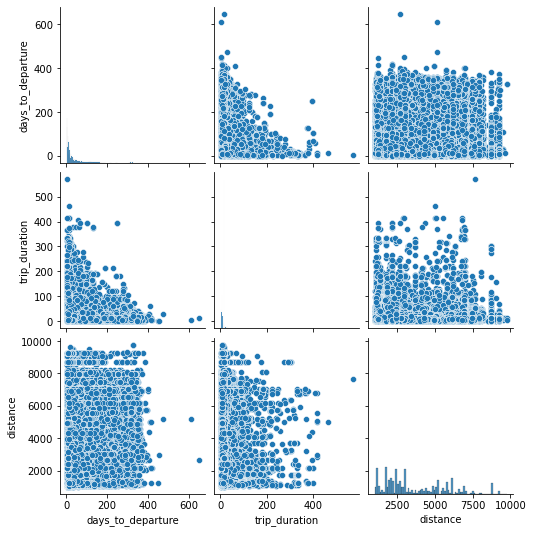

In [55]:
sns.pairplot(df_clean_cities)

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


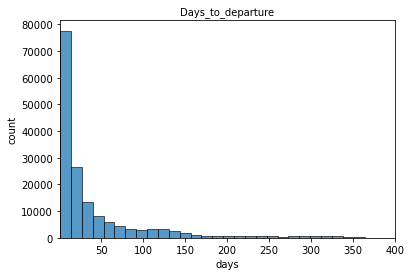

In [54]:
#plt.figure(figsize=(10,3))
fig, ax = plt.subplots()
sns.histplot(df_clean_cities['days_to_departure'], ax=ax,bins=50 )  
ax.set_xlim(1,400)
plt.xlabel("days", fontsize=10)
plt.ylabel("count", fontsize=10)
plt.title("Days_to_departure", fontsize=10, font="bold");
#ax.set_xticks(range(1,200))
plt.show()

In [57]:
#plt.scatter(x=df_clean_cities['trip_duration'], y=df_clean_cities['days_to_departure'])
#plt.show()

In [58]:
#sns.distplot((df_clean_cities['days_to_departure']), bins=50)

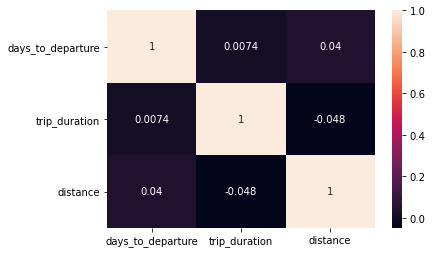

In [55]:
sns.heatmap(df_clean_cities.corr(), annot=True);

In [56]:
df_clean_cities.corr()

,days_to_departure,trip_duration,distance
days_to_departure,1.000000,0.007379,0.039684
trip_duration,0.007379,1.000000,-0.048353
distance,0.039684,-0.048353,1.000000


A Correlation Coefficient near to 0 (both positive or negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other.

In [151]:
df_clean_cities.to_csv('df_clean_cities.csv', index=False)

In [152]:
df_clean_cities.to_excel('df_clean_cities.xlsx', index=False)

#### Chi square value of independen for nominal variables

In [88]:
chi_score, degree_f, p = chi2_by_hand(df_clean_cities,(df_clean_cities['user_country_source2']=='DE'),'searched_destination')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [59]:
def chi2_by_hand(df, col1, col2):    
    
    #---create the contingency table---
    
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)    
    
    #---calculate degree of freedom---
    
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)    
    
    #---sum up the totals for row and columns---
    
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)    
    
    #---create the expected value dataframe---
    
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)    
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats  as stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)    
    
    return chi_square_score, degree_f, p


In [58]:
chi_score, degree_f, p = chi2_by_hand(df_clean_cities,'user_city_source2','searched_destination')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Ziguinchor,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir
user_city_source2,,,,,,,,,,,,,,,,,,,,,
'Tlat Bni Oukil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
's-Gravendeel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
's-Hertogenbosch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A CoruÃƒÂ±a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Rua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã„ÂŒeskÃƒÂ© BudÃ„Â›jovice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ã…Â aÃ„Â¾a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ã…Â eduva,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---Observed (O)---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
user_city_source2,,,,,,,,,,,,,,,,,,,,,
'Tlat Bni Oukil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
's-Gravendeel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
's-Hertogenbosch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
A CoruÃƒÂ±a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
A Rua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã…Â aÃ„Â¾a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Ã…Â eduva,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Ã…Â urany,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


---Expected (E)---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
user_city_source2,,,,,,,,,,,,,,,,,,,,,
'Tlat Bni Oukil,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,2.0
's-Gravendeel,0.000171,0.000293,0.029419,0.001564,0.183210,0.001393,0.000098,0.002712,0.001588,0.010434,...,0.000024,0.000049,0.004960,0.001906,0.000342,0.000024,0.000244,0.000049,0.003567,4.0
's-Hertogenbosch,0.001710,0.002932,0.294191,0.015638,1.832098,0.013928,0.000977,0.027122,0.015882,0.104335,...,0.000244,0.000489,0.049602,0.019059,0.003421,0.000244,0.002443,0.000489,0.035674,40.0
A CoruÃƒÂ±a,0.000428,0.000733,0.073548,0.003910,0.458025,0.003482,0.000244,0.006781,0.003971,0.026084,...,0.000061,0.000122,0.012401,0.004765,0.000855,0.000061,0.000611,0.000122,0.008919,10.0
A Rua,0.000299,0.000513,0.051483,0.002737,0.320617,0.002437,0.000171,0.004746,0.002779,0.018259,...,0.000043,0.000086,0.008680,0.003335,0.000599,0.000043,0.000428,0.000086,0.006243,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã…Â aÃ„Â¾a,0.000043,0.000073,0.007355,0.000391,0.045802,0.000348,0.000024,0.000678,0.000397,0.002608,...,0.000006,0.000012,0.001240,0.000476,0.000086,0.000006,0.000061,0.000012,0.000892,1.0
Ã…Â eduva,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,2.0
Ã…Â urany,0.000043,0.000073,0.007355,0.000391,0.045802,0.000348,0.000024,0.000678,0.000397,0.002608,...,0.000006,0.000012,0.001240,0.000476,0.000086,0.000006,0.000061,0.000012,0.000892,1.0


---Chi-Square---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
user_city_source2,,,,,,,,,,,,,,,,,,,,,
'Tlat Bni Oukil,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,6.294269e+03
's-Gravendeel,0.000171,0.000293,0.029419,0.001564,0.183210,0.001393,0.000098,0.002712,0.001588,0.010434,...,0.000024,0.000049,0.004960,0.001906,0.000342,0.000024,0.000244,0.000049,0.003567,6.606562e+02
's-Hertogenbosch,0.001710,0.002932,0.294191,0.015638,1.832098,0.013928,0.000977,0.027122,0.015882,0.104335,...,0.000244,0.000489,0.049602,0.019059,0.003421,0.000244,0.002443,0.000489,0.035674,2.795427e+03
A CoruÃƒÂ±a,0.000428,0.000733,0.073548,0.003910,0.458025,0.003482,0.000244,0.006781,0.003971,0.026084,...,0.000061,0.000122,0.012401,0.004765,0.000855,0.000061,0.000611,0.000122,0.008919,5.723246e+03
A Rua,0.000299,0.000513,0.051483,0.002737,0.320617,0.002437,0.000171,0.004746,0.002779,0.018259,...,0.000043,0.000086,0.008680,0.003335,0.000599,0.000043,0.000428,0.000086,0.006243,2.165172e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã…Â aÃ„Â¾a,0.000043,0.000073,0.007355,0.000391,0.045802,0.000348,0.000024,0.000678,0.000397,0.002608,...,0.000006,0.000012,0.001240,0.000476,0.000086,0.000006,0.000061,0.000012,0.000892,7.240942e+01
Ã…Â eduva,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,6.045645e+03
Ã…Â urany,0.000043,0.000073,0.007355,0.000391,19.878691,0.000348,0.000024,0.000678,0.000397,0.002608,...,0.000006,0.000012,0.001240,0.000476,0.000086,0.000006,0.000061,0.000012,0.000892,2.083289e+01


Chi2_score: 20885934.05009398, Degrees of freedom: 7089234, p-value: 0.0


A try to apply the function on only DE - doesn´t work

In [98]:
selected_country = (df_clean_cities['user_country_source2']=='DE')
destinations = df_clean_cities['searched_destination']

chi_score, degree_f, p = chi2_by_hand(df_clean_cities,selected_country,destinations)
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

KeyError: "None of [Index(['Sharjah', 'Kathmandu', 'Kathmandu', 'Cairo', 'Cairo', 'Funchal',\n       'Istanbul', 'Geneva', 'Agadir', 'Tangier',\n       ...\n       'Moroni', 'Moroni', 'Moroni', 'Moroni', 'Moroni', 'Moroni',\n       'Thessaloniki', 'Cairo', 'Cairo', 'Cairo'],\n      dtype='object', length=163703)] are in the [columns]"

In [63]:
chi_score, degree_f, p = chi2_by_hand(df_clean_cities,'website_language','searched_destination')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Ziguinchor,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0,0,0,0,953,0,2,0,0,0,...,0,0,0,0,39,0,0,0,0,0
ar,0,0,705,3,2376,12,0,18,33,307,...,0,0,2,48,0,0,0,10,0,33
be,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
bg-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
da,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
de,0,2,0,0,206,0,0,1,11,3,...,0,0,0,16,7,0,1,0,0,22
de-,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
el,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
en,1,6,498,22,3519,41,0,65,18,97,...,0,1,0,92,12,13,0,0,1,48


---Observed (O)---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0,0,0,0,953,0,2,0,0,0,...,0,0,0,39,0,0,0,0,0,9402
ar,0,0,705,3,2376,12,0,18,33,307,...,0,2,48,0,0,0,10,0,33,56015
be,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,285
bg-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
da,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
de,0,2,0,0,206,0,0,1,11,3,...,0,0,16,7,0,1,0,0,22,4474
de-,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
el,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
en,1,6,498,22,3519,41,0,65,18,97,...,1,0,92,12,13,0,0,1,48,66392


---Expected (E)---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0.402033,0.689199,69.149667,3.675730,430.634723,3.273697,0.229733,6.375094,3.733163,24.524010,...,0.057433,0.114867,11.658956,4.479796,0.804066,0.057433,0.574333,0.114867,8.385259,9402.0
ar,2.395222,4.106095,411.978156,21.899171,2565.624759,19.503949,1.368698,37.981375,22.241346,146.108532,...,0.342175,0.684349,69.461433,26.689615,4.790444,0.342175,3.421745,0.684349,49.957484,56015.0
be,0.012187,0.020891,2.096113,0.111421,13.053701,0.099235,0.006964,0.193246,0.113162,0.743389,...,0.001741,0.003482,0.353414,0.135795,0.024373,0.001741,0.017410,0.003482,0.254180,285.0
bg-,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,2.0
da,0.001283,0.002199,0.220643,0.011729,1.374074,0.010446,0.000733,0.020342,0.011912,0.078251,...,0.000183,0.000367,0.037202,0.014294,0.002566,0.000183,0.001833,0.000367,0.026756,30.0
de,0.191310,0.327960,32.905298,1.749119,204.920203,1.557809,0.109320,3.033628,1.776449,11.669902,...,0.027330,0.054660,5.547986,2.131739,0.382620,0.027330,0.273300,0.054660,3.990177,4474.0
de-,0.000941,0.001613,0.161805,0.008601,1.007654,0.007660,0.000538,0.014917,0.008735,0.057384,...,0.000134,0.000269,0.027281,0.010482,0.001881,0.000134,0.001344,0.000269,0.019621,22.0
el,0.000128,0.000220,0.022064,0.001173,0.137407,0.001045,0.000073,0.002034,0.001191,0.007825,...,0.000018,0.000037,0.003720,0.001429,0.000257,0.000018,0.000183,0.000037,0.002676,3.0
en,2.838946,4.866765,488.298736,25.956079,3040.916880,23.117133,1.622255,45.017575,26.361643,173.175715,...,0.405564,0.811127,82.329438,31.633971,5.677892,0.405564,4.055637,0.811127,59.212305,66392.0


---Chi-Square---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0.402033,0.689199,69.149667,3.675730,633.635582,3.273697,13.641241,6.375094,3.733163,24.524010,...,0.057433,0.114867,11.658956,266.004205,0.804066,0.057433,0.574333,0.114867,8.385259,60327.865073
ar,2.395222,4.106095,208.413481,16.310146,14.015124,2.887069,1.368698,10.511872,5.204210,177.170109,...,0.342175,2.529319,6.630919,26.689615,4.790444,0.342175,12.646596,0.684349,5.756020,34867.300511
be,0.012187,0.020891,2.096113,0.111421,3.811539,0.099235,0.006964,0.193246,0.113162,0.743389,...,0.001741,0.003482,0.353414,0.135795,0.024373,0.001741,0.017410,0.003482,29.662183,3950.827339
bg-,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,149.922907
da,0.001283,0.002199,0.220643,0.011729,1.374074,0.010446,0.000733,0.020342,0.011912,0.078251,...,0.000183,0.000367,0.037202,0.014294,0.002566,0.000183,0.001833,0.000367,0.026756,8690.260832
de,0.191310,8.524577,32.905298,1.749119,0.005690,1.557809,0.109320,1.363266,47.889867,6.441117,...,0.027330,0.054660,19.690854,11.117672,0.382620,34.617182,0.273300,0.054660,81.288044,15589.299257
de-,0.000941,0.001613,0.161805,0.008601,0.000058,0.007660,0.000538,0.014917,0.008735,0.057384,...,0.000134,0.000269,0.027281,0.010482,0.001881,0.000134,0.001344,0.000269,0.019621,16053.565221
el,0.000128,0.000220,0.022064,0.001173,0.137407,0.001045,0.000073,0.002034,0.001191,0.007825,...,0.000018,0.000037,0.003720,0.001429,0.000257,0.000018,0.000183,0.000037,0.002676,675.576943
en,1.191190,0.263876,0.192740,0.602963,75.162682,13.833763,1.622255,8.869810,2.652227,33.507813,...,0.871267,0.811127,1.135921,12.186040,9.442458,0.405564,4.055637,0.043979,2.123136,25867.049438


Chi2_score: 517517.63943535276, Degrees of freedom: 41369, p-value: 0.0


##### Another approach - but somehow wrong

https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

In [94]:
# create contingency table
data_crosstab = pd.crosstab(df_clean_cities['user_country_source2'],
                            df_clean_cities['searched_destination'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = df['user_country_source2'].unique()
columns = df['searched_destination'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

KeyError: nan

#### Only for country DE

In [91]:
import scipy.stats as stats

# create contingency table
selected_country = (df_clean_cities['user_country_source2']=='DE')
destinations = df_clean_cities['searched_destination']

data_crosstab = pd.crosstab(selected_country,
                            destinations,
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = selected_country.unique()
columns = destinations.unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 49683.617945364975  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 49683.617945364975  and p value is: 1084.009807259026
Null Hypothesis is rejected.


Another approach 

http://localhost:8891/notebooks/Desktop/travel_destinations_analysis/TS%20-%20Pearson%20chi%20square%20-%20independence.ipynb

#### Further approach

In [95]:
myCrosstable = pd.crosstab(df_clean_cities['user_city_source2'],
                            df_clean_cities['searched_destination'])
                           #margins=True, margins_name="Total")
#myCrosstable

In [67]:
from scipy.stats import chi2_contingency

chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(20885934.050093994,
 0.0,
 7089234,
 array([[8.55207296e-05, 1.46606965e-04, 1.47095655e-02, ...,
         1.22172471e-04, 2.44344942e-05, 1.78371807e-03],
        [1.71041459e-04, 2.93213930e-04, 2.94191310e-02, ...,
         2.44344942e-04, 4.88689884e-05, 3.56743615e-03],
        [1.71041459e-03, 2.93213930e-03, 2.94191310e-01, ...,
         2.44344942e-03, 4.88689884e-04, 3.56743615e-02],
        ...,
        [8.55207296e-05, 1.46606965e-04, 1.47095655e-02, ...,
         1.22172471e-04, 2.44344942e-05, 1.78371807e-03],
        [4.27603648e-05, 7.33034825e-05, 7.35478275e-03, ...,
         6.10862354e-05, 1.22172471e-05, 8.91859037e-04],
        [4.27603648e-05, 7.33034825e-05, 7.35478275e-03, ...,
         6.10862354e-05, 1.22172471e-05, 8.91859037e-04]]))

In [68]:
exp.min()

6.1086235438568626e-06

In [69]:
len(exp[exp < 5]) / len(exp) * 100

100951.92827664722

Another library, but not able to install

In [62]:
import researchpy

crosstab, res, exp = researchpy.crosstab(df_clean_cities['user_city_source2'],df_clean_cities['searched_destination'], test='chi-square', expected_freqs=True)

NameError: name 'researchpy' is not defined

### SQL Integration

In [71]:
import getpass
import sqlalchemy as sa

In [72]:
driver = 'mysql+pymysql'
user = 'root'
password = getpass.getpass(prompt='Your password:'"")
ip = '127.0.0.1'  

Your password:········


In [73]:
connection_string = f'{driver}://{user}:{password}@{ip}'

In [74]:
db_connection = sa.create_engine(connection_string)

In [75]:
insp = sa.inspect(db_connection)
db_list = insp.get_schema_names()
print(db_list)

['bank', 'bank_schema', 'information_schema', 'lab_db', 'lab_db_python_sql', 'lab_group_by_db', 'mysql', 'olist', 'performance_schema', 'sakila', 'sys', 'travel']


In [77]:
query="SELECT * FROM travel.travel"
travel = pd.read_sql_query(query, db_connection)
travel.head()

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AAE/wjE8vdKAM/5wIgm+lzMggnQ=,2019-08-06 00:26:59,Dammam,SA,ar,15,5,Sharjah,1751.40
1,AAJxNQjR5b+EpApPE9CfR0i5ew4=,2019-08-14 11:08:23,Dubai,AE,en,45,37,Kathmandu,2990.55
2,AAJxNQjR5b+EpApPE9CfR0i5ew4=,2019-08-14 11:08:23,Dubai,AE,en,42,38,Kathmandu,2990.55
3,AAPohIYHePQvSMeyL1q3hqilhBI=,2019-08-29 21:40:20,Dammam,SA,ar,7,3,Cairo,2415.46
4,AAPohIYHePQvSMeyL1q3hqilhBI=,2019-08-29 21:40:20,Dammam,SA,ar,7,14,Cairo,2415.46


In [ ]:


#Passing Parameter into a query


#loan_id_threshold=5300
#query = 'SELECT * FROM bank.loan where loan_id<'+str(loan_id_threshold)
#filtered_loans = pd.read_sql_query(query, db_connection)
#filtered_loans.head()

